# Trabajo Practico 2

## Carga de datos

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos una variable con la ruta
ruta_archivo = "servicio_meteorológico_no.csv"

# Cargamos los datos en el dataframe con el enconding utf8
df = pd.read_csv(ruta_archivo, encoding="mac_latin2")

# Mostramos las primeras filas y las ultimas para verificar
print(df.head())
print(df.tail())

         Estación                 Valor Medio de   Ene   Feb   Mar   Abr  \
0  LA QUIACA OBS.         Temperatura (grados C)  12.8  12.5  12.4  10.9   
1  LA QUIACA OBS.  Temperatura máxima (grados C)  20.1  19.9  19.9  19.7   
2  LA QUIACA OBS.  Temperatura mínima (grados C)   7.4   7.0   6.3   2.8   
3  LA QUIACA OBS.           Humedad relativa (%)  65.3  64.1  62.4  48.2   
4  LA QUIACA OBS.    Velocidad del Viento (km/h)   6.9   7.1   6.5   6.4   

    May   Jun   Jul   Ago   Sep   Oct   Nov   Dic  
0   6.9   4.4   4.1   6.7   9.3  11.7  12.8  13.2  
1  17.3  15.6  15.4  17.4  19.2  21.1  21.7  21.3  
2  -3.0  -6.2  -6.8  -4.2  -1.1   2.8   5.2   6.9  
3  34.6  31.1  30.1  31.7  34.4  45.3  52.3  59.2  
4   6.0   4.9   6.6   6.6   8.6   8.7   8.8   8.3  
            Estación                                     Valor Medio de   Ene  \
587  BASE SAN MARTIN                               Humedad relativa (%)   S/D   
588  BASE SAN MARTIN                        Velocidad del Viento (km/

## Limpieza de datos

In [40]:
import numpy as np
# Creamos un diccionario con las palabras a reemplazar
reemplazos = {
    'mxima': 'máxima',
    'mnima': 'mínima',
    'Precipitacin': 'Precipitación',
    'das': 'días',
}
# Aca remplazamos las palabras con errores asignandole el diccionario creado
df.rename(columns={'Estacin': 'Estación'}, inplace=True)
# Aca este en particular no andaba con el replace.
df = df.replace(reemplazos, regex=True)
# Aca cambiamos los S/D que es sin datos a valor nulo
df.replace("S/D", np.nan, inplace=True)
# Primero podemos verificar el tema de los valores nulos
df = df.dropna() # PREGUNTAR HAY QUE BORRAR LOS NULOS?
# Tambien podemos verificar el tema de las filas duplicadas
df = df.drop_duplicates()
print(df.tail())


            Estación                 Valor Medio de   Ene   Feb   Mar   Abr  \
584  BASE SAN MARTIN         Temperatura (grados C)   2.0   0.9  -1.2  -3.3   
585  BASE SAN MARTIN  Temperatura máxima (grados C)   4.5   3.3   1.3  -0.9   
586  BASE SAN MARTIN  Temperatura mínima (grados C)  -0.3  -1.3  -3.6  -5.8   
588  BASE SAN MARTIN    Velocidad del Viento (km/h)  14.6  17.7  22.3  20.4   
589  BASE SAN MARTIN      Nubosidad total (octavos)   6.2   6.5   6.3   6.0   

      May    Jun    Jul    Ago    Sep    Oct   Nov   Dic  
584  -5.3   -9.3  -11.6  -11.5   -8.9   -5.9  -2.0   0.8  
585  -2.3   -5.8   -7.3   -6.9   -4.6   -2.1   1.2   3.4  
586  -8.4  -13.5  -16.3  -16.8  -13.9  -10.2  -5.5  -1.8  
588  19.3   18.0   17.3   18.9   17.5   20.3  19.2  18.3  
589   5.8    5.2    5.5    5.9    6.3    6.4   6.4   6.2  


## Analisis descriptivo

In [ ]:

#Creamos los dataframes por separado
#nuevoDF = datos[datos.columns[2:]] #Solo de Enero-Diciembre
nuevoDF=df[df['Valor Medio de']=='Temperatura (grados C)'].head(10)
nuevoDF= nuevoDF.set_index('Estación')
#nuevoDF = nuevoDF.applymap(pd.to_numeric)
#Temperatura
DFTemp = nuevoDF[nuevoDF.columns[1:]].transpose()
DFTemp = DFTemp.applymap(pd.to_numeric)
print(DFTemp.describe())
print(DFTemp.mean()) # Devuelve una serie con el promedio de temperatura anual de cada ciudad
print(DFTemp.mean(axis=1)) # Devuelve una serie con el promedio de temperatura total de todas las ciudades por mes
"""
Fijate ahi tenes el promedio en forma de serie de la temperatura nada mas, faltaria la mediana y desviacion estandar
"""


In [ ]:
import statistics as st
import matplotlib.pyplot as plt

resumen_estadisticas = df.describe()
#print(resumen_estadisticas)

df_enero_diciembre = df[df.columns[2:]].transpose()
#print(df_enero_diciembre)

df_enero_diciembre.columns = df["Valor Medio de"]
#print(df_enero_diciembre)

df_enero_diciembre = df_enero_diciembre.loc["Ene":"Dic"]
#print(df_enero_diciembre)

temperatura_media = df_enero_diciembre[
    df_enero_diciembre.index == "Temperatura (grados C)"
].transpose()
temperatura_maxima = df_enero_diciembre[
    df_enero_diciembre.index == "Temperatura máxima (grados C)"
].transpose()
temperatura_minima = df_enero_diciembre[
    df_enero_diciembre.index == "Temperatura mínima (grados C)"
].transpose()
humedad_relativa = df_enero_diciembre[
    df_enero_diciembre.index == "Humedad relativa (%)"
].transpose()
velocidad_viento = df_enero_diciembre[
    df_enero_diciembre.index == "Velocidad del Viento (km/h)"
].transpose()

variables = [
    temperatura_media,
    temperatura_maxima,
    temperatura_minima,
    humedad_relativa,
    velocidad_viento,
]

for variable in variables:
    if not variable.empty:
        estacion = variable.columns[0]
        valores_numericos = pd.to_numeric(variable[estacion], errors="coerce").dropna()

        media = st.mean(valores_numericos)
        mediana = st.median(valores_numericos)
        desviacion_estandar = st.stdev(valores_numericos)

        print(f"Estadísticas para {estacion}:")
        print(f"  Media: {media}")
        print(f"  Mediana: {mediana}")
        print(f"  Desviación estándar: {desviacion_estandar}")
        print("\n")
    else:
        print(
            f"No hay datos para {variable.index[0]} en el rango de meses seleccionado."
        )

for variable in variables:
    if not variable.empty:  # Verificar si el DataFrame no está vacío
        estacion = variable.columns[0]
        valores_numericos = pd.to_numeric(variable[estacion], errors="coerce").dropna()

        plt.figure(figsize=(8, 6))
        plt.boxplot(valores_numericos)
        plt.title(f"Boxplot de {estacion}")
        plt.show()
    else:
        print(
            f"No hay datos para {variable.index[0]} en el rango de meses seleccionado."
        )


DFTemp1=DFTemp.groupby(['Valor Medio de'])[meses].mean()
print(DFTemp1)

## Analisis Temporal

Temperatura mensual 
Ene    24.46
Feb    23.52
Mar    22.47
Abr    19.38
May    15.75
Jun    13.37
Jul    12.91
Ago    15.31
Sep    17.56
Oct    21.01
Nov    22.59
Dic    24.05
dtype: float64
Temperatura mensual minima
Ene    18.89
Feb    18.29
Mar    17.53
Abr    14.44
May    10.36
Jun     7.76
Jul     6.52
Ago     8.35
Sep    10.61
Oct    14.55
Nov    16.43
Dic    18.18
dtype: float64
Temperatura mensual maxima
Ene    30.81
Feb    29.79
Mar    28.58
Abr    25.41
May    22.28
Jun    20.34
Jul    20.80
Ago    23.60
Sep    25.58
Oct    28.55
Nov    29.67
Dic    30.70
dtype: float64


/tmp/ipykernel_1082/2042938365.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  temp = temp.applymap(pd.to_numeric)
/tmp/ipykernel_1082/2042938365.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  temp_min = temp_min.applymap(pd.to_numeric)
/tmp/ipykernel_1082/2042938365.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  temp_max = temp_max.applymap(pd.to_numeric)


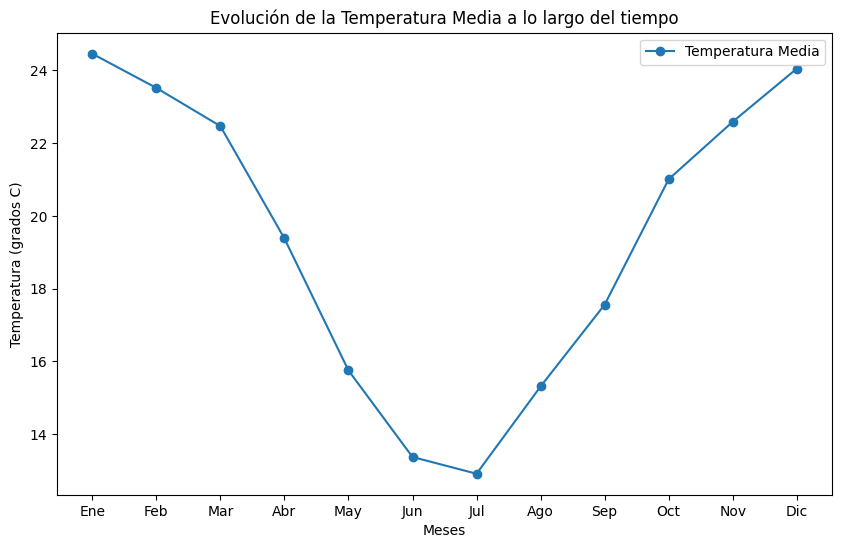

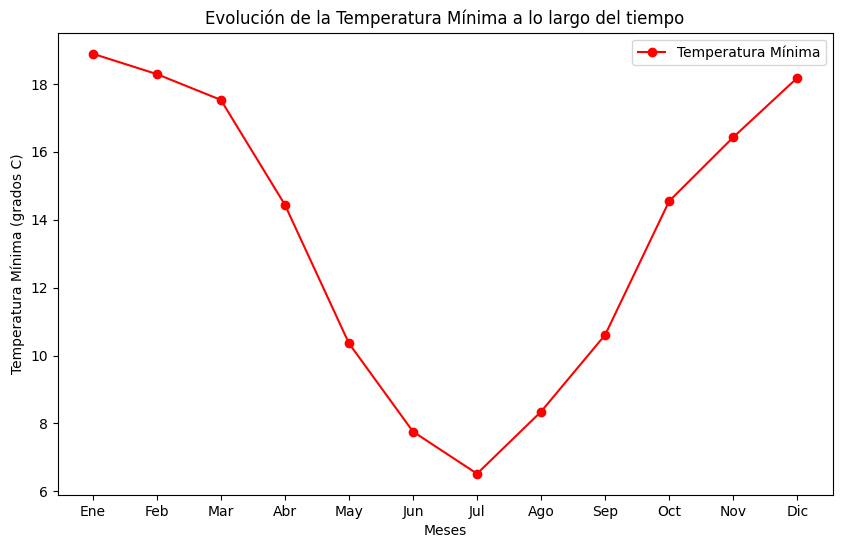

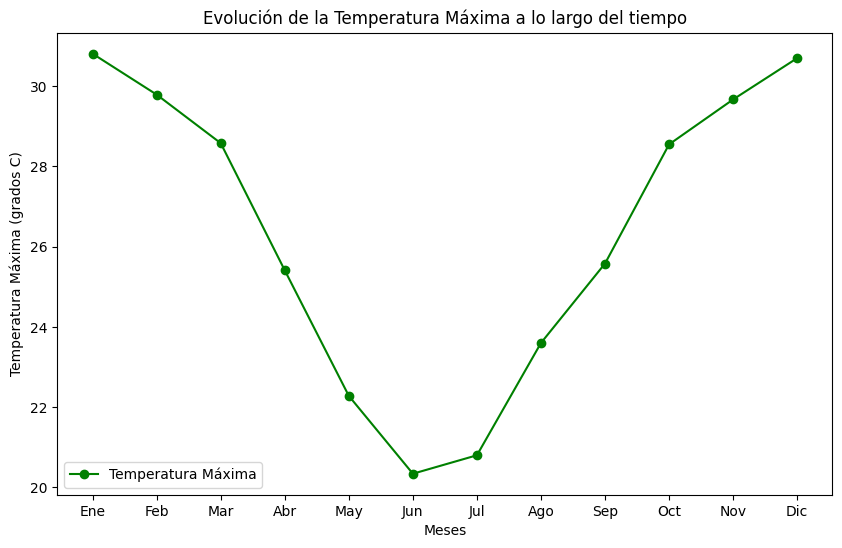

In [41]:
df_temperatura=df[df['Valor Medio de']=='Temperatura (grados C)'].head(10)
df_temperatura= df_temperatura.set_index('Estación')
df_temperatura_min=df[df['Valor Medio de']=='Temperatura mínima (grados C)'].head(10)
df_temperatura_min= df_temperatura_min.set_index('Estación')
df_temperatura_max=df[df['Valor Medio de']=='Temperatura máxima (grados C)'].head(10)
df_temperatura_max= df_temperatura_max.set_index('Estación')
#nuevoDF = nuevoDF.applymap(pd.to_numeric)
#Temperatura
temp = df_temperatura[df_temperatura.columns[1:]].transpose()
temp = temp.applymap(pd.to_numeric)
temp_min = df_temperatura_min[df_temperatura_min.columns[1:]].transpose()
temp_min = temp_min.applymap(pd.to_numeric)
temp_max = df_temperatura_max[df_temperatura_max.columns[1:]].transpose()
temp_max = temp_max.applymap(pd.to_numeric)
print(f'Temperatura mensual \n{temp.mean(axis=1)}')
print(f'Temperatura mensual minima\n{temp_min.mean(axis=1)}')
print(f'Temperatura mensual maxima\n{temp_max.mean(axis=1)}')


plt.figure(figsize=(10, 6))
plt.plot(temp.mean(axis=1), label='Temperatura Media', marker='o')
plt.title('Evolución de la Temperatura Media a lo largo del tiempo')
plt.xlabel('Meses')
plt.ylabel('Temperatura (grados C)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(temp_min.mean(axis=1), label='Temperatura Mínima', marker='o', color='r')
plt.title('Evolución de la Temperatura Mínima a lo largo del tiempo')
plt.xlabel('Meses')
plt.ylabel('Temperatura Mínima (grados C)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(temp_max.mean(axis=1), label='Temperatura Máxima', marker='o', color='g')
plt.title('Evolución de la Temperatura Máxima a lo largo del tiempo')
plt.xlabel('Meses')
plt.ylabel('Temperatura Máxima (grados C)')
plt.legend()
plt.show()